<div style="text-align:left"> LE GOURRIEREC Titouan <br/> LEROY Emma <br/> CYSIQUE ROAN <br/> EL MANNAOUY Aymen
<h1><center>MACHINE LEARNING PROJECT : <br/> Machine Learning to detect lung diseases</center></h1>
<h3><center>IMT Mines Alès</center></h3>

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.utils import shuffle as shf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



#import pickle
import os
#import glob as gb

from imblearn.over_sampling import SMOTE


In [2]:
# Dictionary mapping class names to numerical codes
code = {'NORMAL' : 0 , 'PNEUMONIA' : 1}

def getcode(number) :
    '''
    function to return the class of the images from its number

    Parameters :
        number (int): The numerical code for which the corresponding class name is to be retrieved.

    Returns :
        class_name (str) : The class name corresponding to the input numerical code.

    Example :
        code = {'NORMAL': 0, 'PNEUMONIA': 1}
        getcode(0) -> 'NORMAL'
    '''

    for class_name , class_number in code.items() : 
        if number == class_number : 
            return class_name

---
### Images Import 
This code loads images from a specified directory, resizes them to 64x64 pixels, and stores the images and their labels in lists for further processing. <br/>
Then, we create a training game (80%) and a test game (20%).

In [3]:
# Directory containing images
path = '/Users/titouanlegourrierec/Desktop/chest_xray_global'

size = 64

# Lists to store resized images and corresponding labels
X_import = []
y_import = []

# Traverse through the directories in the images directory
for folder in os.listdir(path):
    if folder != ".DS_Store":
        files = os.listdir(os.path.join(path, folder)) # Get the list of image files in the current folder
        for file in files:
            if file.endswith('.jpeg'):
                image_path = os.path.join(path, folder, file) # Construct path to the image file
                image = cv2.imread(image_path) # Read the image using OpenCV
                resized_image = cv2.resize(image, (size, size)) # Resize the image to 64 x 64 pixels
                X_import.append(resized_image) # Append the resized image to X_import
                y_import.append(code[folder]) # Append the label of the image to y_import

# Convert lists to numpy arrays for efficient computation
X_import = np.array(X_import)
y_import = np.array(y_import)

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_import, y_import, test_size=0.2, random_state=1234) # random_state=1234 to make the work reproducible

In [5]:
print('Training set size : {}'.format(len(X_train)))
print('Testing set size : {}'.format(len(X_test)))

Training set size : 4684
Testing set size : 1172


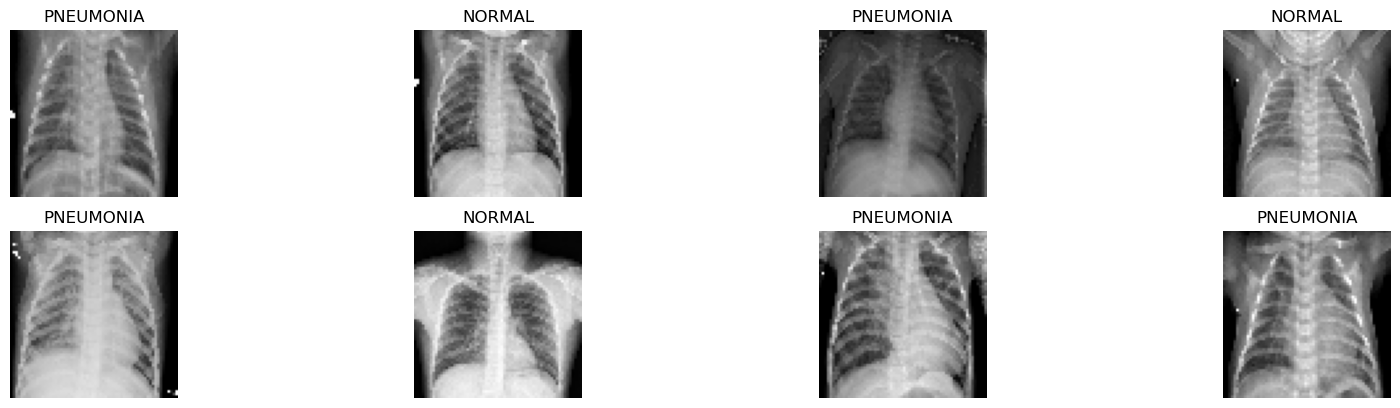

In [6]:
plt.figure(figsize=(20, 10))

# Generate 8 random indices within the range of the training set
for i, j in enumerate(np.random.randint(0, len(X_train), 8)):
    plt.subplot(4, 4, i+1)
    
    plt.imshow(X_train[j], cmap='gray')
    
    plt.axis('off')
    
    plt.title(getcode(y_train[j]))

plt.show()

In [6]:
X_train = X_train.reshape([-1, np.product((size,size,3))])
X_test = X_test.reshape([-1, np.product((size,size,3))])

In [7]:
print(X_train.shape)
print(y_train.shape)

(4684, 12288)
(4684,)


---
### Models training
This part of the code creates instances of classification algorithms such as K Nearest Neighbors, Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine, with default parameters. Then, these models are trained on the training data to adjust their internal parameters and prepare them for prediction on new data.

In [9]:
#making an instance of each algorithm
knn = KNeighborsClassifier(n_neighbors=10)
log_reg  = LogisticRegression()
dtc  = DecisionTreeClassifier()
rfc = RandomForestClassifier()
svm = SVC()

In [10]:
#fitting each model using X_train and y_train
knn.fit(X_train, y_train)
log_reg.fit(X_train, y_train)
dtc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
svm.fit(X_train, y_train)

/Users/titouanlegourrierec/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

---
### Testing models
This part of the code generates predictions for each classification model, then uses a function named print_metrics to display various evaluation metrics such as accuracy, precision, recall, F1-score, and the confusion matrix for each model.

In [11]:
# Calculate predictions for each model
knn_pred = knn.predict(X_test)
log_reg_pred = log_reg.predict(X_test)
dtc_pred = dtc.predict(X_test)
rfc_pred = rfc.predict(X_test)
svm_pred = svm.predict(X_test)

In [12]:
def print_metrics(classifier_name, y_test, y_pred):
    '''
    Prints various evaluation metrics for a classifier.

    Parameters:
        - classifier_name (str): Name of the classifier.
        - y_test (array-like): True labels.
        - y_pred (array-like): Predicted labels.

    Returns:
        None

    Metrics Printed:
        - Accuracy: The proportion of correctly classified instances.
        - Precision: The ratio of correctly predicted positive observations to the total predicted positives.
        - Recall: The ratio of correctly predicted positive observations to the all observations in actual class.
        - F1-score: The weighted average of Precision and Recall.
        - Confusion Matrix: A table used to describe the performance of a classification model.
    '''
    
    print(f'\n{classifier_name} Metrics:')
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1-score:', f1_score(y_test, y_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))

print_metrics('KNN', y_test, knn_pred)
print_metrics('Logistic Regression', y_test, log_reg_pred)
print_metrics('Decision Tree Classifier', y_test, dtc_pred)
print_metrics('Random Forest Classifier', y_test, rfc_pred)
print_metrics('Support Vector Machine Classifier', y_test, svm_pred)


KNN Metrics:
Accuracy: 0.9206484641638225
Precision: 0.9134720700985761
Recall: 0.9834905660377359
F1-score: 0.9471890971039183
Confusion Matrix:
[[245  79]
 [ 14 834]]

Logistic Regression Metrics:
Accuracy: 0.9334470989761092
Precision: 0.9518779342723005
Recall: 0.9563679245283019
F1-score: 0.9541176470588235
Confusion Matrix:
[[283  41]
 [ 37 811]]

Decision Tree Classifier Metrics:
Accuracy: 0.8660409556313993
Precision: 0.8985005767012687
Recall: 0.9186320754716981
F1-score: 0.9084548104956268
Confusion Matrix:
[[236  88]
 [ 69 779]]

Random Forest Classifier Metrics:
Accuracy: 0.9445392491467577
Precision: 0.9484536082474226
Recall: 0.9764150943396226
F1-score: 0.9622312608948285
Confusion Matrix:
[[279  45]
 [ 20 828]]

Support Vector Machine Classifier Metrics:
Accuracy: 0.9522184300341296
Precision: 0.956221198156682
Recall: 0.9787735849056604
F1-score: 0.9673659673659674
Confusion Matrix:
[[286  38]
 [ 18 830]]


In [13]:
def plot_confusion_matrix(predictions, y_test, title):
    """
    Plots a confusion matrix using Seaborn.

    Parameters:
    - predictions (array-like): Predicted labels.
    - y_test (array-like): True labels.
    - title (str): Title for the plot.

    Returns:
    None
    """
    # Define class labels
    labels = ['Normal', 'Pneumonia']

    # Compute confusion matrix
    cm = confusion_matrix(y_test, predictions)

    # Create a DataFrame for better visualization
    cm = pd.DataFrame(cm, index=labels, columns=labels)

    # Transpose the confusion matrix for correct orientation
    cm = cm.T

    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # Adjust font size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
                linewidths=1, linecolor='black', square=True,
                xticklabels=labels, yticklabels=labels)  # Swap x and y tick labels

    # Set title and axis labels
    plt.title(title)
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=0)

    # Show the plot
    return plt.gcf()

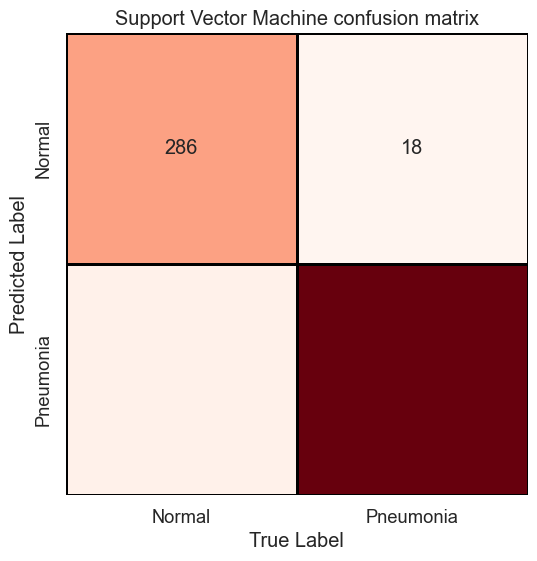

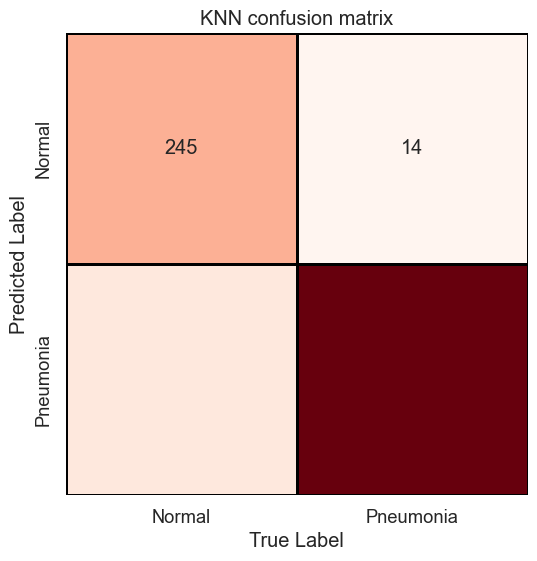

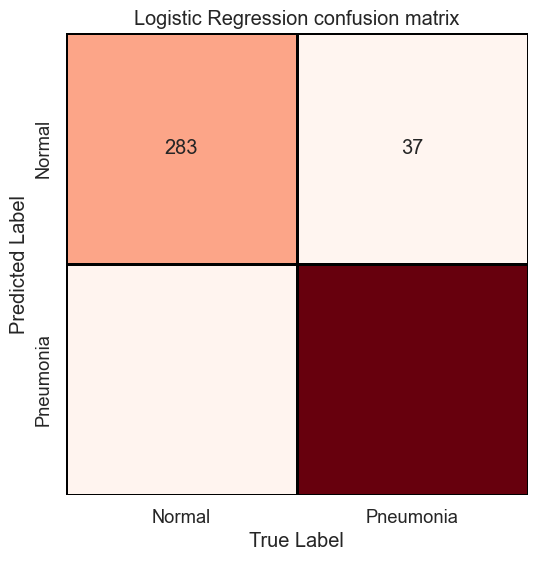

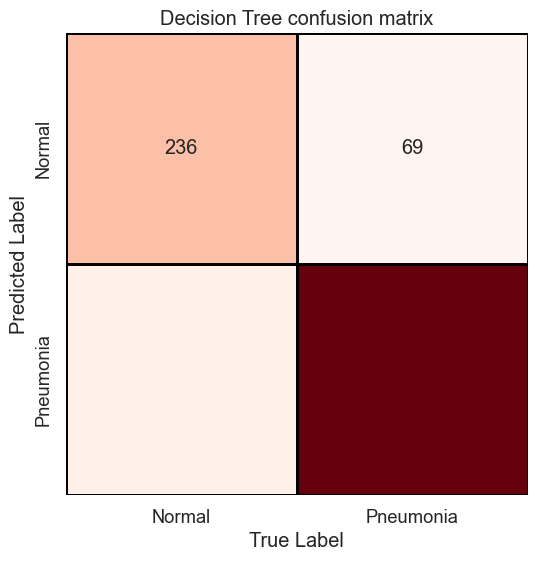

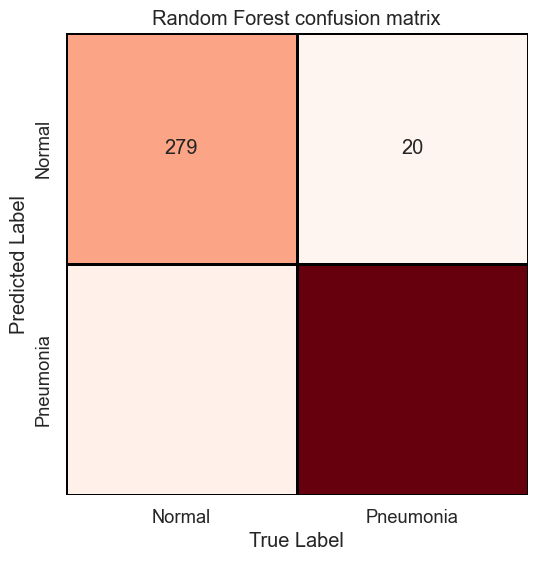

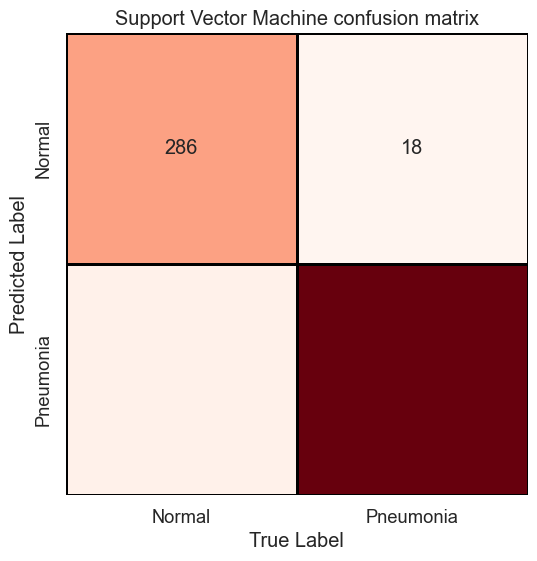

In [14]:

plot_confusion_matrix(knn_pred, y_test, 'KNN confusion matrix')
plot_confusion_matrix(log_reg_pred, y_test, 'Logistic Regression confusion matrix')
plot_confusion_matrix(dtc_pred, y_test, 'Decision Tree confusion matrix')
plot_confusion_matrix(rfc_pred, y_test, 'Random Forest confusion matrix')
plot_confusion_matrix(svm_pred, y_test, 'Support Vector Machine confusion matrix')


---
### Testing different strategies to counter class imbalance

In [15]:
def hist(y_train): # Count the number of zeros and ones
    counts = np.bincount(y_train)

    # Create a bar plot
    plt.bar([0, 1], counts, tick_label=['NORMAL', 'PNEUMONIA'])

    plt.ylabel('Number of occurrences')
    plt.title('Distribution of the “NORMAL” and “PNEUMONIA” classes')
    
    plt.show()

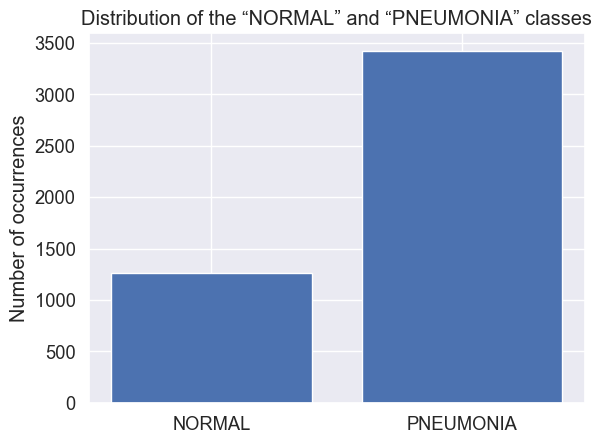

In [16]:
hist(y_train)

---
Imbalanced-learn est une bibliothèque Python open-source conçue pour traiter les problèmes de déséquilibre de classes dans l'apprentissage automatique, en particulier dans le contexte de la classification. Cette bibliothèque fournit un ensemble d'outils et de techniques pour gérer les ensembles de données où une classe est significativement moins représentée que les autres, ce qui peut conduire à des modèles biaisés ou peu performants.

## Oversampling technique

### RandomOverSampler

In [17]:
from imblearn.over_sampling import RandomOverSampler

randomover = RandomOverSampler(random_state = 1234)
X_train_randomover, y_train_randomover = randomover.fit_resample(X_train, y_train)

X_train_randomover = X_train_randomover.reshape(-1, size, size, 3)

In [18]:
#making an instance of each algorithm
knn_randomover = KNeighborsClassifier(n_neighbors=10)
log_reg_randomover  = LogisticRegression()
dtc_randomover  = DecisionTreeClassifier()
rfc_randomover = RandomForestClassifier()
svm_randomover = SVC()

In [19]:
X_train_randomover = X_train_randomover.reshape([-1, np.product((size,size,3))])

#fitting each model using X_train and y_train
knn_randomover.fit(X_train_randomover, y_train_randomover)
log_reg_randomover.fit(X_train_randomover, y_train_randomover)
dtc_randomover.fit(X_train_randomover, y_train_randomover)
rfc_randomover.fit(X_train_randomover, y_train_randomover)
svm_randomover.fit(X_train_randomover, y_train_randomover)

/Users/titouanlegourrierec/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

In [20]:
# Calculate predictions for each model
knn_pred_randomover = knn_randomover.predict(X_test)
log_reg_pred_randomover = log_reg_randomover.predict(X_test)
dtc_pred_randomover = dtc_randomover.predict(X_test)
rfc_pred_randomover = rfc_randomover.predict(X_test)
svm_pred_randomover = svm_randomover.predict(X_test)

In [21]:
print_metrics('KNN randomover', y_test, knn_pred_randomover)
print_metrics('Logistic Regression randomover', y_test, log_reg_pred_randomover)
print_metrics('Decision Tree Classifier randomover', y_test, dtc_pred_randomover)
print_metrics('Random Forest Classifier randomover', y_test, rfc_pred_randomover)
print_metrics('Support Vector Machine Classifier randomover', y_test, svm_pred_randomover)


KNN randomover Metrics:
Accuracy: 0.9197952218430034
Precision: 0.9456264775413712
Recall: 0.9433962264150944
F1-score: 0.9445100354191263
Confusion Matrix:
[[278  46]
 [ 48 800]]

Logistic Regression randomover Metrics:
Accuracy: 0.9377133105802048
Precision: 0.9521586931155193
Recall: 0.9622641509433962
F1-score: 0.9571847507331379
Confusion Matrix:
[[283  41]
 [ 32 816]]

Decision Tree Classifier randomover Metrics:
Accuracy: 0.8754266211604096
Precision: 0.8961625282167043
Recall: 0.9363207547169812
F1-score: 0.9158016147635525
Confusion Matrix:
[[232  92]
 [ 54 794]]

Random Forest Classifier randomover Metrics:
Accuracy: 0.9453924914675768
Precision: 0.9516129032258065
Recall: 0.9740566037735849
F1-score: 0.9627039627039627
Confusion Matrix:
[[282  42]
 [ 22 826]]

Support Vector Machine Classifier randomover Metrics:
Accuracy: 0.9513651877133106
Precision: 0.9702734839476813
Recall: 0.9622641509433962
F1-score: 0.9662522202486679
Confusion Matrix:
[[299  25]
 [ 32 816]]


### SMOTE (Synthetic Minority Over-sampling Technique) : 
SMOTE est une technique de sur-échantillonnage qui vise à équilibrer les ensembles de données en augmentant la représentation de la classe minoritaire. <br/>
Il fonctionne en générant de nouveaux exemples synthétiques pour la classe minoritaire en extrapolant des points à partir des voisins les plus proches dans l'espace des attributs.

<center>

<img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*CeOd_Wbn7O6kpjSTKTIUog.png" style="width:1000px;">

</center>

In [22]:
smote = SMOTE(random_state = 1234)
alpha = 
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

X_train_SMOTE = X_train_SMOTE.reshape(-1, size, size, 3)

SyntaxError: invalid syntax (921987533.py, line 2)

In [ ]:
len(X_train)

NameError: name 'X_train' is not defined

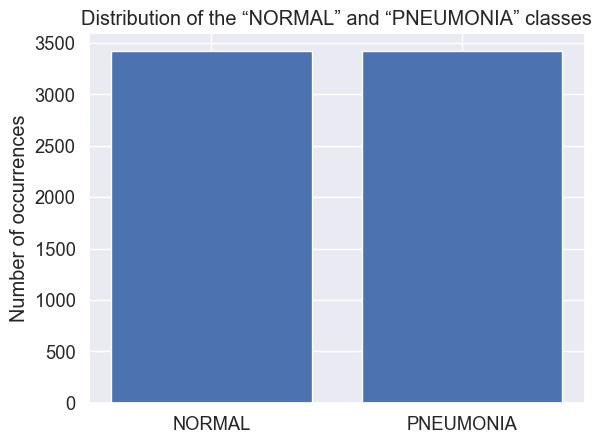

In [ ]:
hist(y_train_SMOTE)

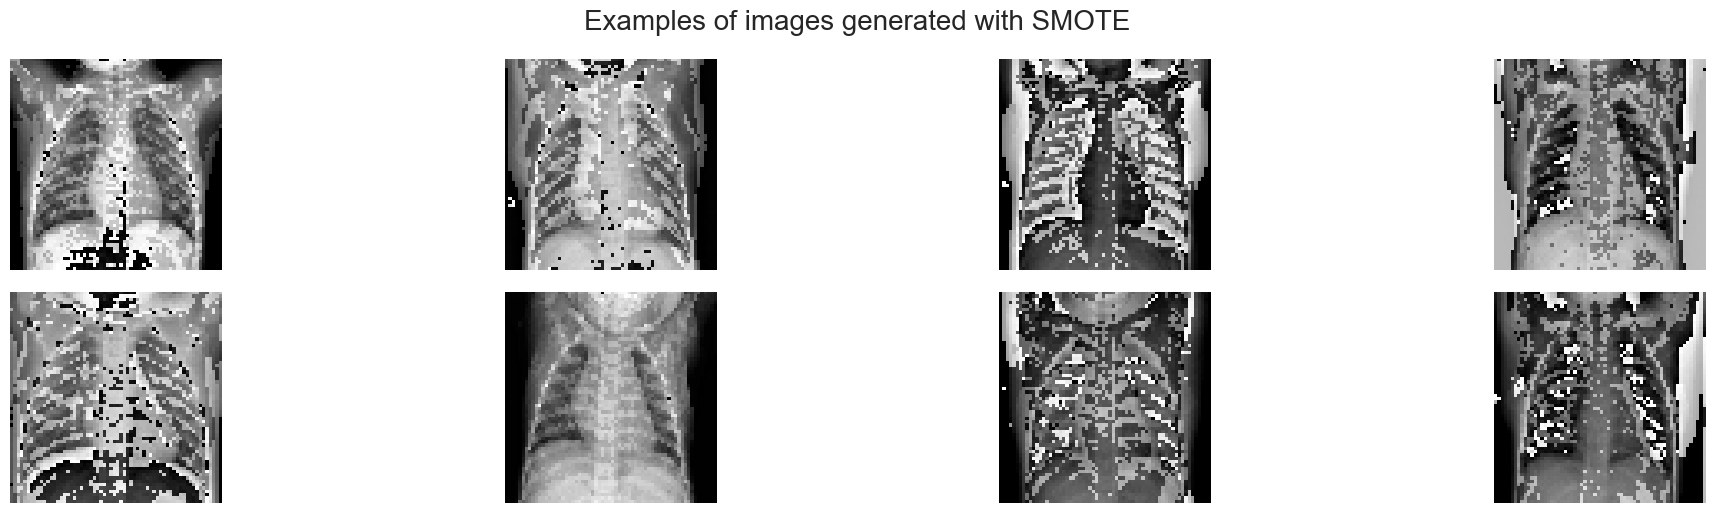

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.suptitle("Examples of images generated with SMOTE", fontsize=20)  # Titre global

# Generate 8 random indices within the range of the training set
for i, j in enumerate(np.random.randint(len(X_train), len(X_train_SMOTE), 8)):
    plt.subplot(4, 4, i+1)
    
    plt.imshow(X_train_SMOTE[j])
    
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#making an instance of each algorithm
knn_SMOTE = KNeighborsClassifier(n_neighbors=10)
log_reg_SMOTE  = LogisticRegression()
dtc_SMOTE  = DecisionTreeClassifier()
rfc_SMOTE = RandomForestClassifier()
svm_SMOTE = SVC()

In [ ]:
X_train_SMOTE = X_train_SMOTE.reshape([-1, np.product((size,size,3))])

#fitting each model using X_train and y_train
knn_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)
log_reg_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)
dtc_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)
rfc_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)
svm_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)

/Users/titouanlegourrierec/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

In [ ]:
# Calculate predictions for each model
knn_pred_SMOTE = knn_SMOTE.predict(X_test)
log_reg_pred_SMOTE = log_reg_SMOTE.predict(X_test)
dtc_pred_SMOTE = dtc_SMOTE.predict(X_test)
rfc_pred_SMOTE = rfc_SMOTE.predict(X_test)
svm_pred_SMOTE = svm_SMOTE.predict(X_test)

In [ ]:
print_metrics('KNN SMOTE', y_test, knn_pred_SMOTE)
print_metrics('Logistic Regression SMOTE', y_test, log_reg_pred_SMOTE)
print_metrics('Decision Tree Classifier SMOTE', y_test, dtc_pred_SMOTE)
print_metrics('Random Forest Classifier SMOTE', y_test, rfc_pred_SMOTE)
print_metrics('Support Vector Machine Classifier SMOTE', y_test, svm_pred_SMOTE)


KNN SMOTE Metrics:
Accuracy: 0.9249146757679181
Precision: 0.9212860310421286
Recall: 0.9799528301886793
F1-score: 0.9497142857142857
Confusion Matrix:
[[253  71]
 [ 17 831]]

Logistic Regression SMOTE Metrics:
Accuracy: 0.9129692832764505
Precision: 0.9398584905660378
Recall: 0.9398584905660378
F1-score: 0.9398584905660378
Confusion Matrix:
[[273  51]
 [ 51 797]]

Decision Tree Classifier SMOTE Metrics:
Accuracy: 0.8660409556313993
Precision: 0.929192546583851
Recall: 0.8820754716981132
F1-score: 0.9050211736237145
Confusion Matrix:
[[267  57]
 [100 748]]

Random Forest Classifier SMOTE Metrics:
Accuracy: 0.931740614334471
Precision: 0.9671532846715328
Recall: 0.9375
F1-score: 0.9520958083832336
Confusion Matrix:
[[297  27]
 [ 53 795]]

Support Vector Machine Classifier SMOTE Metrics:
Accuracy: 0.9522184300341296
Precision: 0.9626168224299065
Recall: 0.9716981132075472
F1-score: 0.9671361502347416
Confusion Matrix:
[[292  32]
 [ 24 824]]


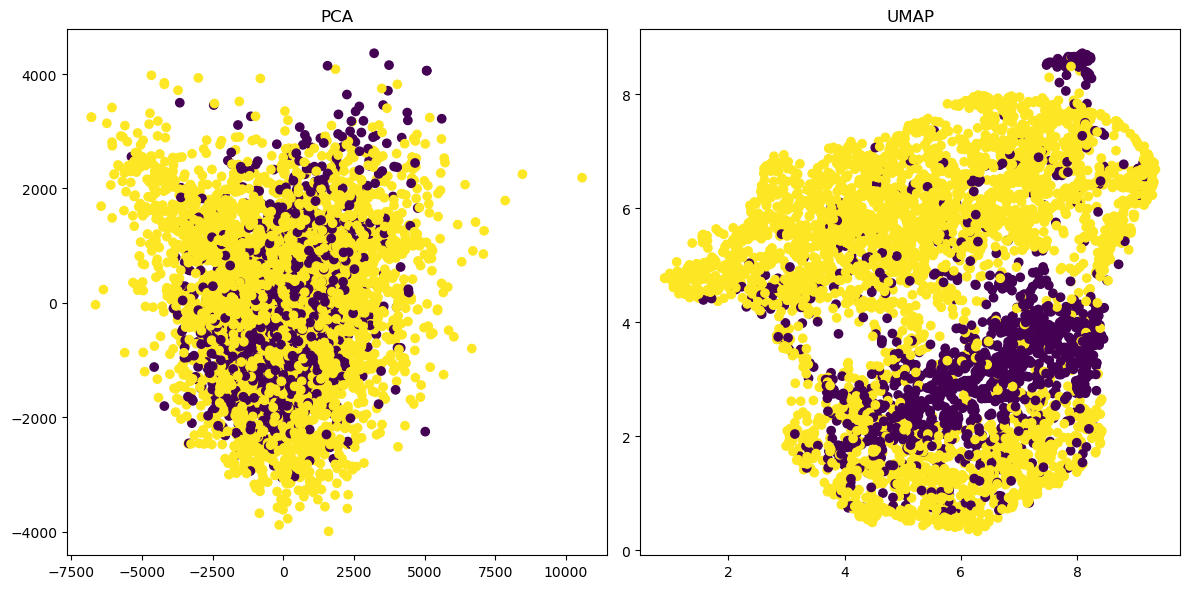

In [ ]:

import numpy as np
from sklearn.decomposition import PCA
from umap import UMAP
import matplotlib.pyplot as plt

# Supposons que vous avez un tableau d'images sous forme d'une matrice numpy, par exemple 'images_data'
# images_data.shape devrait être (n_samples, 64, 64, 3)

# Redimensionnement des données pour qu'elles soient en 2D
# Le -1 signifie que NumPy doit calculer automatiquement la dimension pour correspondre à la taille requise
images_reshaped = X_train.reshape(X_train.shape[0], -1)

# Réduction de dimension avec PCA
pca = PCA(n_components=2)
images_pca = pca.fit_transform(images_reshaped)

# Réduction de dimension avec UMAP
umap = UMAP(n_components=2)
images_umap = umap.fit_transform(images_reshaped)

# Affichage des résultats
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(images_pca[:, 0], images_pca[:, 1], c=y_train, cmap='viridis')  # Assurez-vous d'avoir les étiquettes pour la coloration
plt.title('PCA')

plt.subplot(1, 2, 2)
plt.scatter(images_umap[:, 0], images_umap[:, 1], c=y_train, cmap='viridis')
plt.title('UMAP')

plt.tight_layout()
plt.show()

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import classification_report



from sklearn.model_selection import GridSearchCV
'''
grid = {

    'learning_rate':[0.01,0.05,0.1],

    'n_estimators':np.arange(100,500,5),

}
'''

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

#gb_cv = GridSearchCV(gb, grid, cv = 4)

gb.fit(X_train,y_train)

pred=gb.predict(X_test)

#print("Best Parameters:",gb_cv.best_params_)

#print("Train Score:",gb_cv.best_score_)

#print("Test Score:",gb_cv.score(X_test,y_test))

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85       324
           1       0.93      0.95      0.94       848

    accuracy                           0.92      1172
   macro avg       0.90      0.89      0.90      1172
weighted avg       0.92      0.92      0.92      1172

